<a href="https://www.kaggle.com/code/lalit7881/fifa-player-value-performance-analytics?scriptVersionId=297799803" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fifa-player-performance-and-market-value-analytics/fifa_player_performance_market_value.csv


## Title

FIFA Player Value & Performance Analytics

## Detailed Description

FIFA Player Performance and Market Value Analytics is a comprehensive data analysis project focused on understanding how player performance metrics influence their market value in professional football. Using structured FIFA dataset attributes such as overall rating, potential, age, position, pace, shooting, passing, dribbling, defending, physicality, and international reputation, this study uncovers patterns and trends that drive player valuation in the transfer market.

The project applies statistical analysis, data visualization, and predictive modeling techniques to:

📊 Analyze correlations between performance attributes and market value

📈 Identify key factors that significantly impact a player's price

⚽ Compare performance metrics across positions (forwards, midfielders, defenders, goalkeepers)

🎯 Evaluate age vs. potential growth trends

💰 Predict player market value using regression or machine learning models

🔍 Detect undervalued and overvalued players based on performance indicators

Through exploratory data analysis (EDA), feature engineering, and model evaluation (using metrics such as MAE, RMSE, and R²), the project provides actionable insights for scouts, analysts, clubs, and sports management professionals.

## Import dataset

In [2]:
df = pd.read_csv("/kaggle/input/fifa-player-performance-and-market-value-analytics/fifa_player_performance_market_value.csv")

In [3]:
df.head()

,player_id,player_name,age,nationality,club,position,overall_rating,potential_rating,matches_played,goals,assists,minutes_played,market_value_million_eur,contract_years_left,injury_prone,transfer_risk_level
0,1,Player_1,23,Germany,Liverpool,ST,65,87,8,6,14,2976,122.51,3,No,Low
1,2,Player_2,36,England,FC Barcelona,ST,90,76,19,3,18,2609,88.47,5,No,High
2,3,Player_3,31,France,Juventus,RB,75,91,34,12,15,1158,20.24,3,No,Medium
3,4,Player_4,27,Portugal,Manchester City,LW,90,86,35,18,13,145,164.29,0,Yes,Medium
4,5,Player_5,24,Brazil,Liverpool,CDM,84,96,41,6,6,2226,121.34,4,No,Low


In [4]:
df.tail()

,player_id,player_name,age,nationality,club,position,overall_rating,potential_rating,matches_played,goals,assists,minutes_played,market_value_million_eur,contract_years_left,injury_prone,transfer_risk_level
2795,2796,Player_2796,32,Germany,Bayern Munich,CB,67,65,47,10,12,4067,99.49,3,No,Medium
2796,2797,Player_2797,31,Netherlands,Real Madrid,LB,67,85,5,7,1,3460,74.87,4,No,Low
2797,2798,Player_2798,31,Brazil,Manchester City,ST,93,88,8,36,8,3768,27.01,3,No,Medium
2798,2799,Player_2799,22,Netherlands,Real Madrid,ST,75,73,34,7,6,1934,54.95,4,No,Medium
2799,2800,Player_2800,31,Germany,Liverpool,CDM,72,90,7,11,12,2319,44.83,5,Yes,Low


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   player_id                 2800 non-null   int64  
 1   player_name               2800 non-null   object 
 2   age                       2800 non-null   int64  
 3   nationality               2800 non-null   object 
 4   club                      2800 non-null   object 
 5   position                  2800 non-null   object 
 6   overall_rating            2800 non-null   int64  
 7   potential_rating          2800 non-null   int64  
 8   matches_played            2800 non-null   int64  
 9   goals                     2800 non-null   int64  
 10  assists                   2800 non-null   int64  
 11  minutes_played            2800 non-null   int64  
 12  market_value_million_eur  2800 non-null   float64
 13  contract_years_left       2800 non-null   int64  
 14  injury_p

In [6]:
df.describe()

,player_id,age,overall_rating,potential_rating,matches_played,goals,assists,minutes_played,market_value_million_eur,contract_years_left
count,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000
mean,1400.500000,27.952500,76.866786,81.563929,27.135714,19.261786,12.015000,2250.101429,90.565500,2.527857
std,808.434702,6.750192,9.921113,9.755799,15.979627,11.567858,7.188459,1295.461829,52.078881,1.699445
min,1.000000,17.000000,60.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.670000,0.000000
25%,700.750000,22.000000,68.000000,73.000000,13.750000,9.000000,6.000000,1131.250000,45.355000,1.000000
50%,1400.500000,28.000000,77.000000,82.000000,27.000000,19.000000,12.000000,2251.000000,89.170000,3.000000
75%,2100.250000,34.000000,85.000000,90.000000,41.000000,30.000000,18.000000,3366.250000,136.682500,4.000000
max,2800.000000,39.000000,94.000000,98.000000,54.000000,39.000000,24.000000,4497.000000,179.960000,5.000000


In [7]:
df.dtypes

player_id                     int64
player_name                  object
age                           int64
nationality                  object
club                         object
position                     object
overall_rating                int64
potential_rating              int64
matches_played                int64
goals                         int64
assists                       int64
minutes_played                int64
market_value_million_eur    float64
contract_years_left           int64
injury_prone                 object
transfer_risk_level          object
dtype: object

In [8]:
df.shape

(2800, 16)

In [9]:
df.isnull().sum()

player_id                   0
player_name                 0
age                         0
nationality                 0
club                        0
position                    0
overall_rating              0
potential_rating            0
matches_played              0
goals                       0
assists                     0
minutes_played              0
market_value_million_eur    0
contract_years_left         0
injury_prone                0
transfer_risk_level         0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.columns

Index(['player_id', 'player_name', 'age', 'nationality', 'club', 'position',
       'overall_rating', 'potential_rating', 'matches_played', 'goals',
       'assists', 'minutes_played', 'market_value_million_eur',
       'contract_years_left', 'injury_prone', 'transfer_risk_level'],
      dtype='object')

## EDA

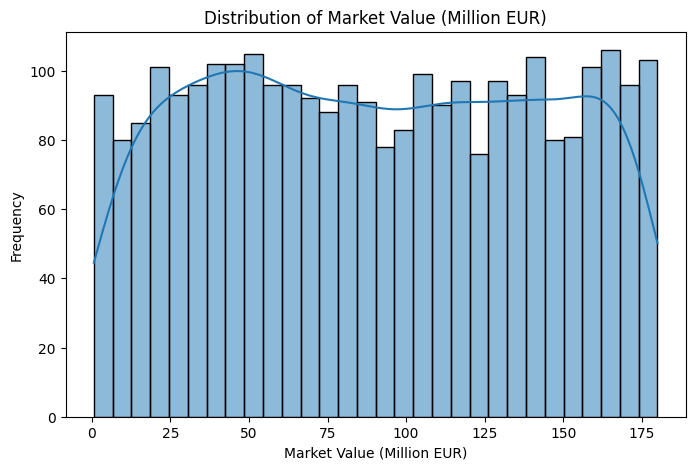

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df['market_value_million_eur'], bins=30, kde=True)
plt.title("Distribution of Market Value (Million EUR)")
plt.xlabel("Market Value (Million EUR)")
plt.ylabel("Frequency")
plt.show()

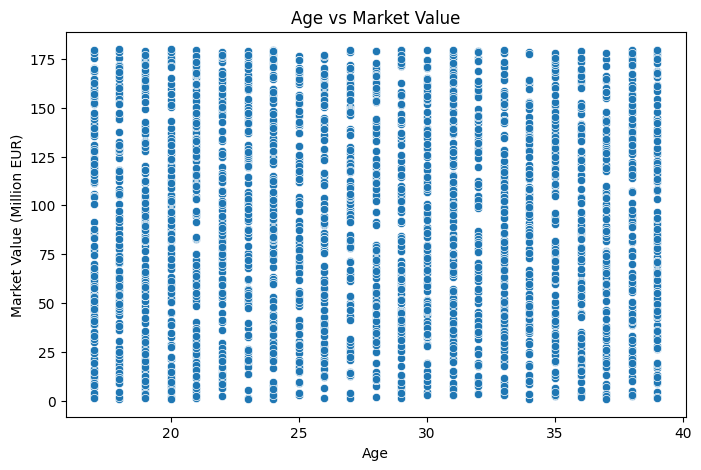

In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='market_value_million_eur', data=df)
plt.title("Age vs Market Value")
plt.xlabel("Age")
plt.ylabel("Market Value (Million EUR)")
plt.show()


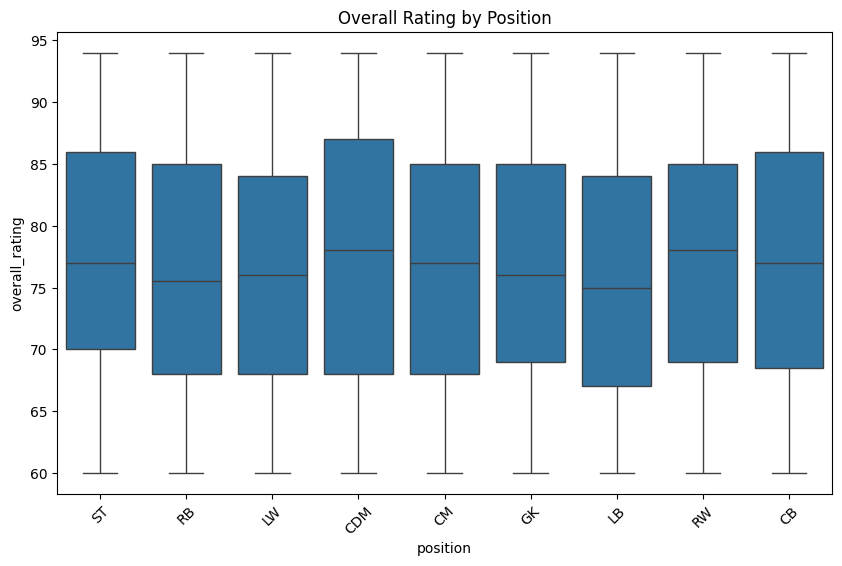

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(x='position', y='overall_rating', data=df)
plt.xticks(rotation=45)
plt.title("Overall Rating by Position")
plt.show()


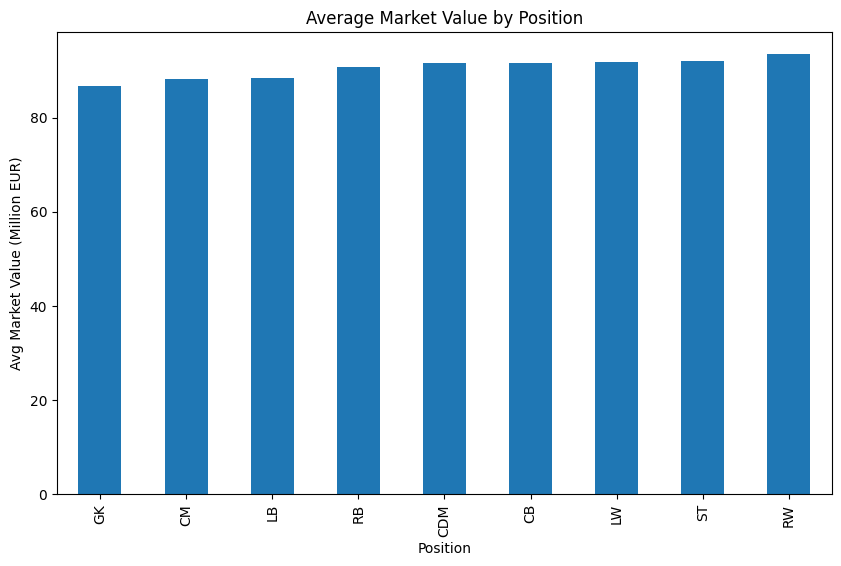

In [15]:
avg_value = df.groupby('position')['market_value_million_eur'].mean().sort_values()

plt.figure(figsize=(10,6))
avg_value.plot(kind='bar')
plt.title("Average Market Value by Position")
plt.xlabel("Position")
plt.ylabel("Avg Market Value (Million EUR)")
plt.show()


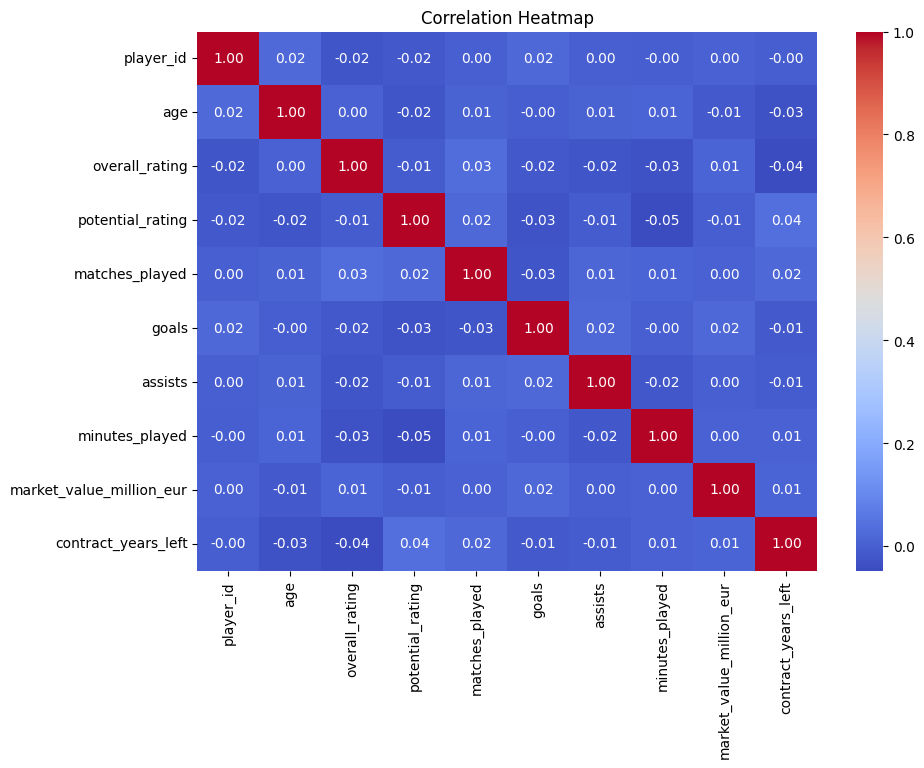

In [16]:
plt.figure(figsize=(10,7))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


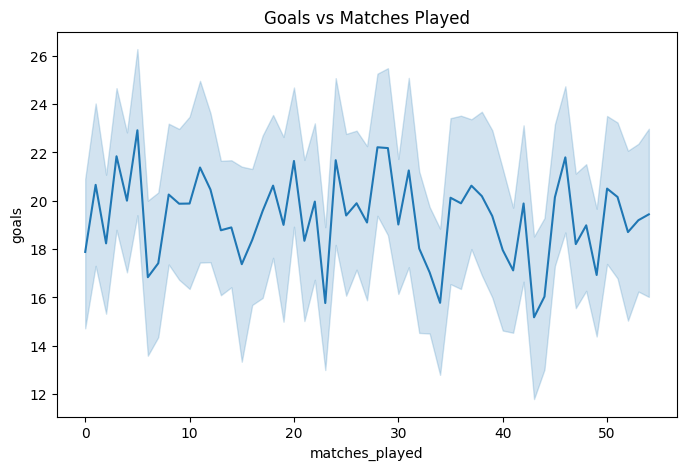

In [17]:
plt.figure(figsize=(8,5))
sns.lineplot(x='matches_played', y='goals', data=df)
plt.title("Goals vs Matches Played")
plt.show()


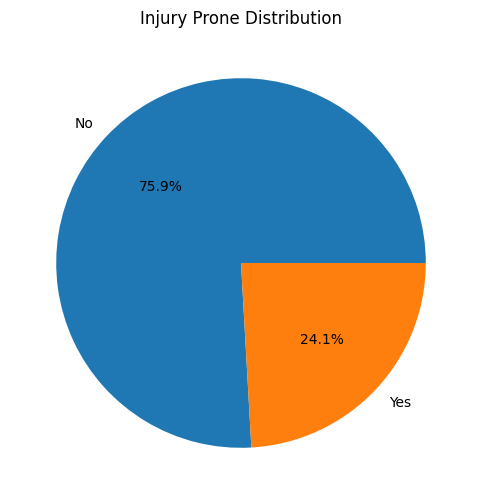

In [18]:
injury_counts = df['injury_prone'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(injury_counts, labels=injury_counts.index, autopct='%1.1f%%')
plt.title("Injury Prone Distribution")
plt.show()


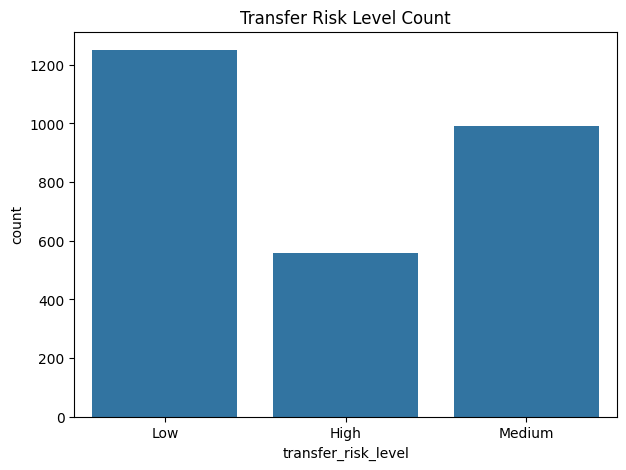

In [19]:
plt.figure(figsize=(7,5))
sns.countplot(x='transfer_risk_level', data=df)
plt.title("Transfer Risk Level Count")
plt.show()


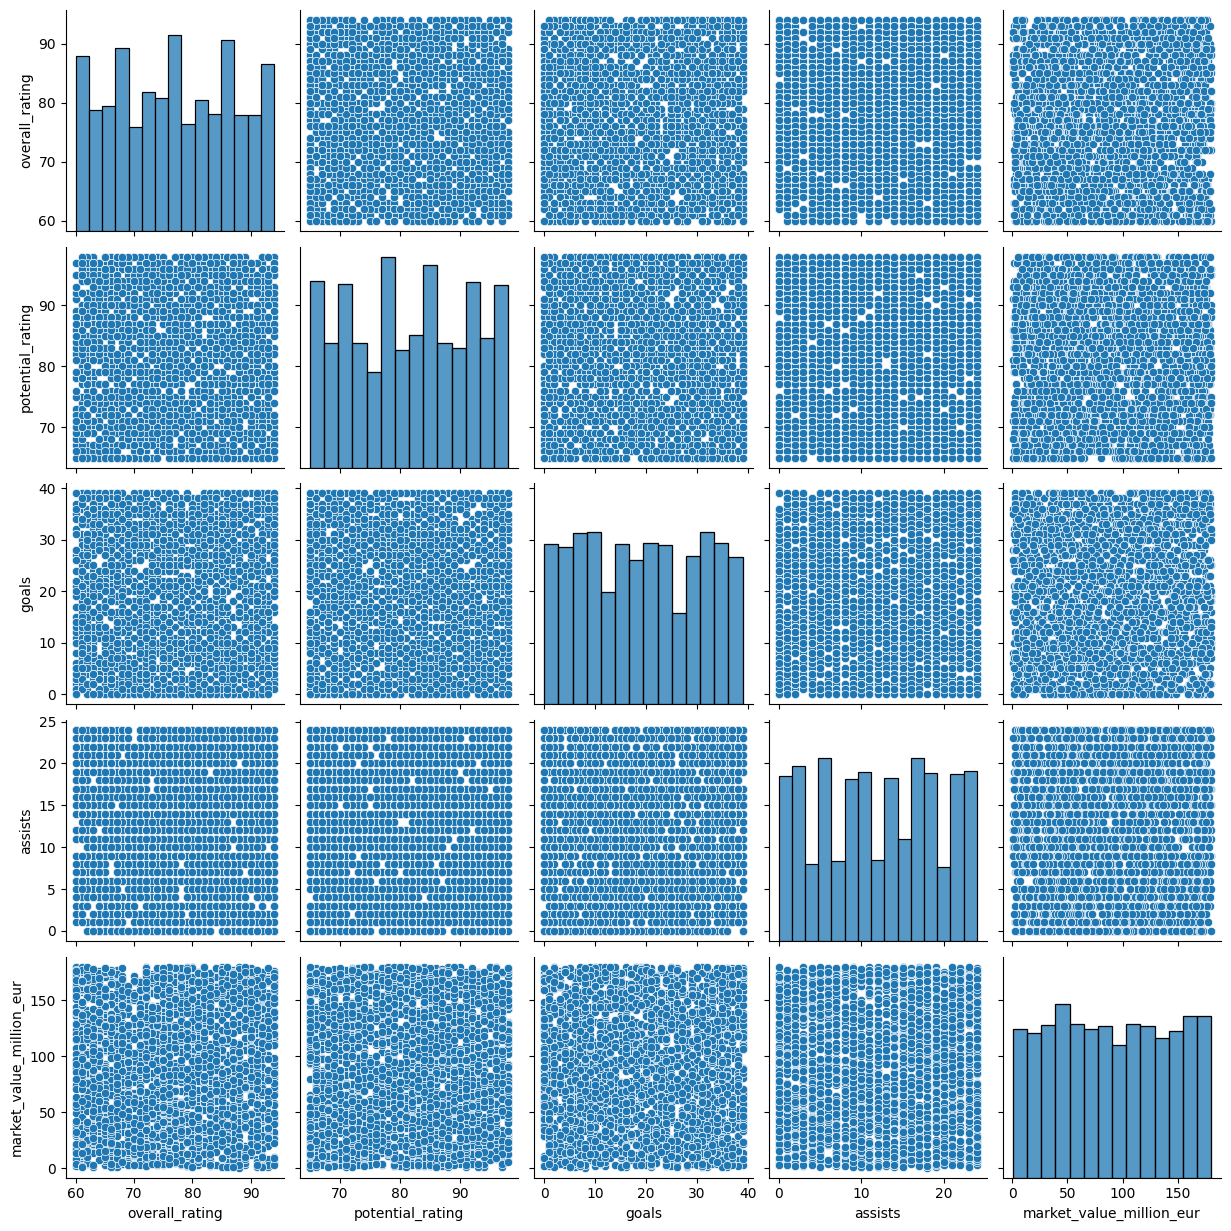

In [20]:
sns.pairplot(df[['overall_rating','potential_rating','goals','assists','market_value_million_eur']])
plt.show()


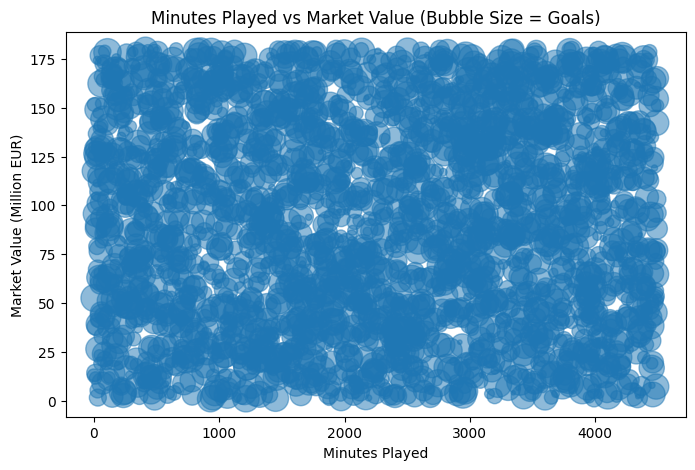

In [21]:
plt.figure(figsize=(8,5))
plt.scatter(df['minutes_played'],
            df['market_value_million_eur'],
            s=df['goals']*10,
            alpha=0.5)

plt.title("Minutes Played vs Market Value (Bubble Size = Goals)")
plt.xlabel("Minutes Played")
plt.ylabel("Market Value (Million EUR)")
plt.show()


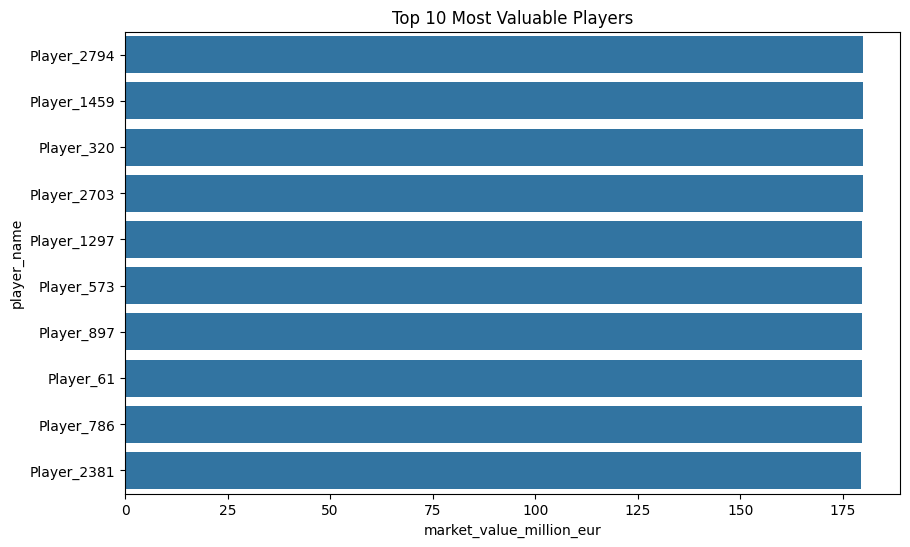

In [22]:
top10 = df.sort_values('market_value_million_eur', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='market_value_million_eur', y='player_name', data=top10)
plt.title("Top 10 Most Valuable Players")
plt.show()


## Feature engg

In [23]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Optional (if installed)
from xgboost import XGBClassifier


In [24]:
data = df.copy()

# Encode categorical columns
cat_cols = ['nationality', 'club', 'position', 'injury_prone', 'transfer_risk_level']
le_dict = {}

for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    le_dict[col] = le

# Define features and target
X = data.drop(columns=['player_id', 'player_name', 'transfer_risk_level'])
y = data['transfer_risk_level']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [25]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(
        n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42
    ),
    "SVM": SVC(kernel='rbf'),
    "Naive Bayes": GaussianNB()
}

# Add XGBoost if available
try:
    models["XGBoost"] = XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=5,
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=42
    )
except:
    print("XGBoost not installed.")


In [26]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print(f"\n{name}")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))



Logistic Regression
Accuracy: 0.43392857142857144
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       102
           1       0.45      0.88      0.60       251
           2       0.32      0.11      0.16       207

    accuracy                           0.43       560
   macro avg       0.26      0.33      0.25       560
weighted avg       0.32      0.43      0.33       560


KNN
Accuracy: 0.37142857142857144
              precision    recall  f1-score   support

           0       0.20      0.21      0.20       102
           1       0.44      0.57      0.50       251
           2       0.32      0.21      0.25       207

    accuracy                           0.37       560
   macro avg       0.32      0.33      0.32       560
weighted avg       0.36      0.37      0.36       560


Decision Tree
Accuracy: 0.4446428571428571
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       102

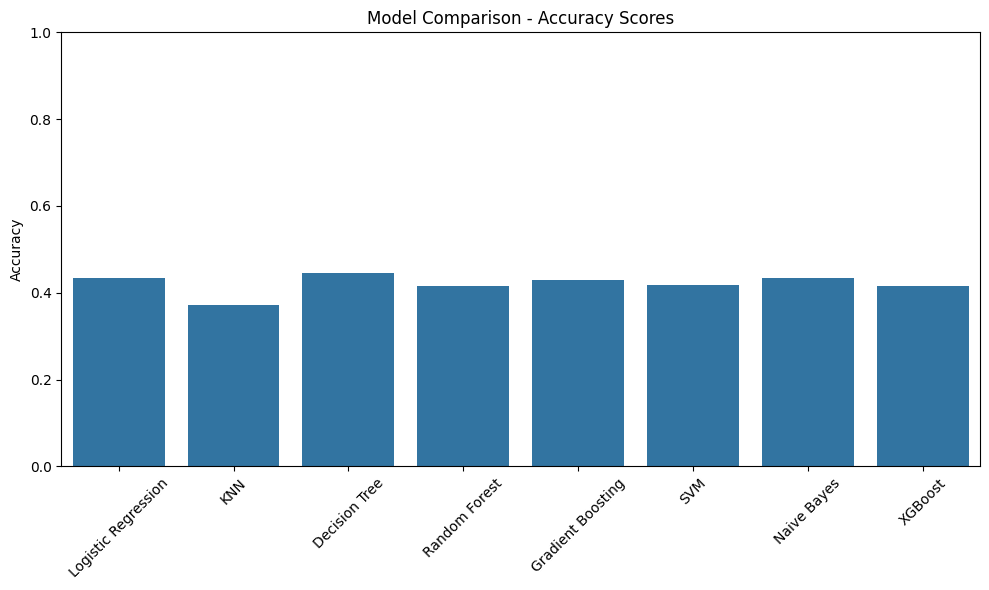

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Comparison - Accuracy Scores")
plt.ylim(0,1)
plt.tight_layout()
plt.show()


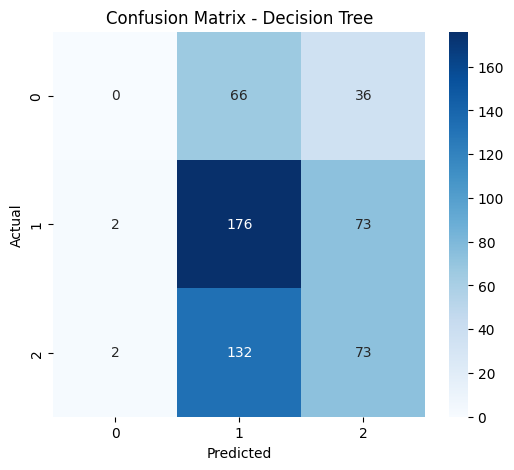

Best Model: Decision Tree
Best Accuracy: 0.4446428571428571


In [28]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()

print("Best Model:", best_model_name)
print("Best Accuracy:", results[best_model_name])


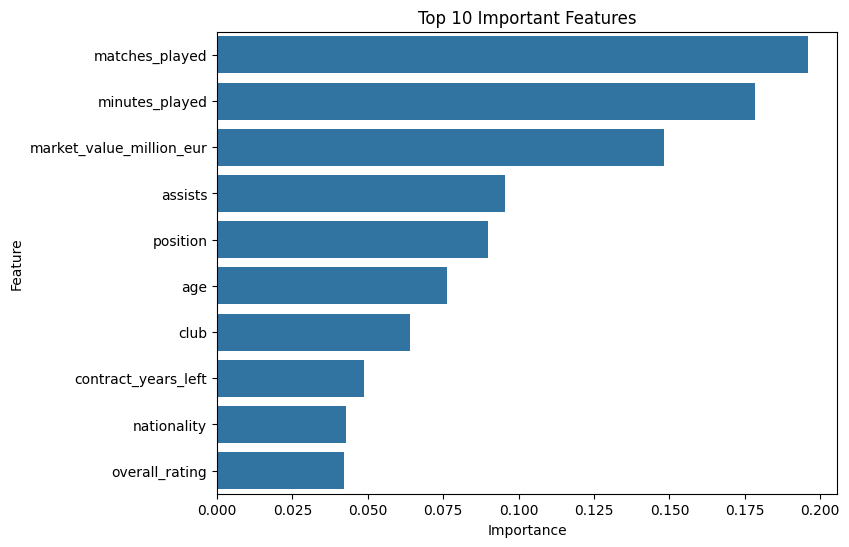

In [29]:
if best_model_name in ["Random Forest", "Decision Tree", "Gradient Boosting", "XGBoost"]:
    importances = best_model.feature_importances_
    feature_names = X.columns
    
    feat_df = pd.DataFrame({
        "Feature": feature_names,
        "Importance": importances
    }).sort_values(by="Importance", ascending=False)
    
    plt.figure(figsize=(8,6))
    sns.barplot(x="Importance", y="Feature", data=feat_df.head(10))
    plt.title("Top 10 Important Features")
    plt.show()


## Thank you..pls upvote!!!